In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data= pd.read_csv("Loan_default.csv")

In [10]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan Date (DD/MM/YYYY)
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,10/15/2018
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,3/25/2016
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,11/11/2013
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,6/22/2017
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,6/9/2014


In [14]:
data.isna().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [15]:
data.shape

(255347, 19)

(Default
 0    225694
 1     29653
 Name: count, dtype: int64,
 Default
 0    0.883872
 1    0.116128
 Name: proportion, dtype: float64)

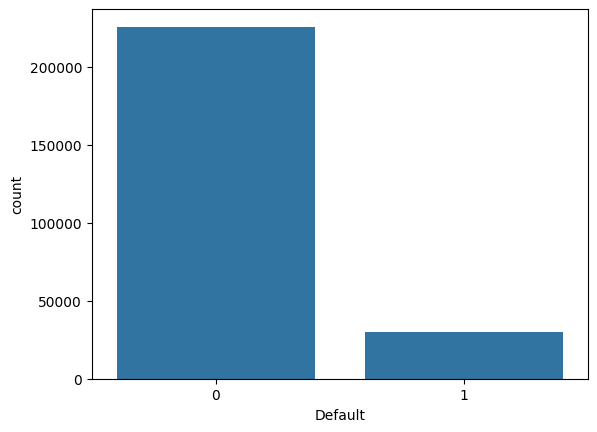

In [22]:
#Imbalanced dataset

## this data cannot be used directly by data scientists
## because even a dumb model which says all predictions are 0 (non defaulters)
## still it would get a accuracy of 88%
### SOLUTION : 1. UPSAMPLING or Use other metrics other than accuracy (For eg. ROC AUC)
ax = sns.countplot(x=data['Default'], data=data)
data['Default'].value_counts(),data['Default'].value_counts(normalize=True)

## Age

In [16]:
data['Age'].describe()

,Age
count,255347.000000
mean,43.498306
std,14.990258
min,18.000000
25%,31.000000
50%,43.000000
75%,56.000000
max,69.000000


In [18]:
import numpy as np
conditions = [
    (data['Age'] <= 30),
    (data['Age'] > 30) & (data['Age'] <= 50),
    (data['Age'] > 50)
]

choice = ['young borrowers', 'middle age borrowers', 'old borrowers']

data['age_group'] = np.select(conditions, choice, default='unknown')

In [19]:
data['age_group'].value_counts(),data['age_group'].value_counts(normalize=True)

(age_group
 middle age borrowers    98596
 old borrowers           93174
 young borrowers         63577
 Name: count, dtype: int64,
 age_group
 middle age borrowers    0.386126
 old borrowers           0.364892
 young borrowers         0.248983
 Name: proportion, dtype: float64)

In [18]:
data.groupby('age_group')['Default'].mean()
## Lenders often perceive younger borrowers (21-30) as higher risk due to limited credit history,
## while older borrowers (51+) may face stricter eligibility requirements and potentially higher
## interest rates due to nearing retirement. Mid-age borrowers (31-50) generally have more established credit and income,
## making them more attractive to lenders.

,Default
age_group,
middle age borrowers,0.118453
old borrowers,0.060629
young borrowers,0.193859


## Loan Term

In [20]:
### pivot_table for two categorical features one being loan_status
def pivot(col):
  return pd.pivot_table(data,'LoanID',index=[col],columns=['Default'],aggfunc='count')

LoanTerm
48    51166
60    51154
36    51061
24    51009
12    50957
Name: count, dtype: int64


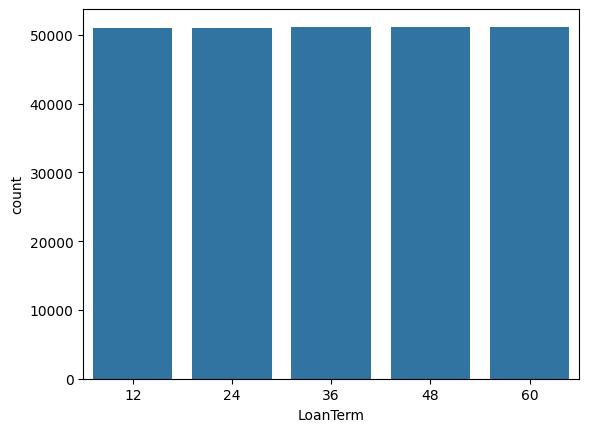

In [21]:
ax = sns.countplot(x=data['LoanTerm'], data=data)
print(data['LoanTerm'].value_counts())

In [22]:
pivot('LoanTerm')


Default,0,1
LoanTerm,,
12,45037,5920
24,45088,5921
36,45154,5907
48,45244,5922
60,45171,5983


In [2]:
## Most defauters are from 60 months loan term

In [23]:
data.columns
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan Date (DD/MM/YYYY),age_group
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,10/15/2018,old borrowers
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,3/25/2016,old borrowers
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,11/11/2013,middle age borrowers
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,6/22/2017,middle age borrowers
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,6/9/2014,old borrowers


## Interest Rate

In [26]:
## FILTER - 1. Define Filter, 2. Wrap in data
filter_defaulter = (data['Default']==1)
data_defaulter = data[filter_defaulter]

filter_nondefaulter = (data['Default']==0)
data_nondefaulter = data[filter_nondefaulter]

In [27]:
## for defaulters we can see that the interest rate is higher than global average of interest rates
## which can be one of the reasons behind defaulting.
data_defaulter.groupby('age_group')['InterestRate'].agg(['min','mean','max'])

,min,mean,max
age_group,,,
middle age borrowers,2.01,15.921583,25.0
old borrowers,2.00,16.016339,25.0
young borrowers,2.00,15.817147,25.0


In [28]:
data_nondefaulter.groupby('age_group')['InterestRate'].agg(['min','mean','max'])

,min,mean,max
age_group,,,
middle age borrowers,2.0,13.192753,25.0
old borrowers,2.0,13.310854,25.0
young borrowers,2.0,12.921670,25.0


In [29]:
data.groupby('age_group')['InterestRate'].agg(['min','mean','max'])

,min,mean,max
age_group,,,
middle age borrowers,2.0,13.515991,25.0
old borrowers,2.0,13.474884,25.0
young borrowers,2.0,13.482986,25.0


# Income

In [30]:
data['Income'].describe()

,Income
count,255347.000000
mean,82499.304597
std,38963.013729
min,15000.000000
25%,48825.500000
50%,82466.000000
75%,116219.000000
max,149999.000000


In [34]:
conditions= [
    (data['Income']<=45000),
    (data['Income']>45000) & (data['Income']<=75000),
    (data['Income']>75000) & (data['Income']<=110000),
    (data['Income']>110000)
]
choice= ['low income','lower-mid income','upper-mid income','high income']
data['income_group']= np.select(conditions,choice,default='unknown')


In [35]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan Date (DD/MM/YYYY),age_group,income_group
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Full-time,Divorced,Yes,Yes,Other,Yes,0,10/15/2018,old borrowers,upper-mid income
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,Full-time,Married,No,No,Other,Yes,0,3/25/2016,old borrowers,lower-mid income
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Unemployed,Divorced,Yes,Yes,Auto,No,1,11/11/2013,middle age borrowers,upper-mid income
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,Full-time,Married,No,No,Business,No,0,6/22/2017,middle age borrowers,low income
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,Unemployed,Divorced,No,Yes,Auto,No,0,6/9/2014,old borrowers,low income


In [36]:
data.groupby("income_group")['Default'].mean()

,Default
income_group,
high income,0.090548
low income,0.179581
lower-mid income,0.109399
upper-mid income,0.096820


- most of the defaulter are seen from the low income group.



# Credit Score Analysis

In [40]:
data['CreditScore'].describe()
conditions= [
   (data['CreditScore']<=579),
    (data['CreditScore']>579) & (data['CreditScore']<=669),
    (data['CreditScore']>669) & (data['CreditScore']<=739),
    (data['CreditScore']>739) & (data['CreditScore']<=799),
     (data['CreditScore']>799)
]
choice= ['poor','fair','good','very good','exceptional']
data['credit_score_group']= np.select(conditions,choice,default='unknown')
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan Date (DD/MM/YYYY),age_group,income_group,credit_score_group
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Divorced,Yes,Yes,Other,Yes,0,10/15/2018,old borrowers,upper-mid income,poor
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,Married,No,No,Other,Yes,0,3/25/2016,old borrowers,lower-mid income,poor
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Divorced,Yes,Yes,Auto,No,1,11/11/2013,middle age borrowers,upper-mid income,poor
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,Married,No,No,Business,No,0,6/22/2017,middle age borrowers,low income,very good
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,Divorced,No,Yes,Auto,No,0,6/9/2014,old borrowers,low income,fair


In [42]:
data.groupby('credit_score_group')['Default'].mean()

,Default
credit_score_group,
exceptional,0.098134
fair,0.114321
good,0.106289
poor,0.124748
very good,0.104990


## Credit score vs marital status vs churn

- therefore, poor credit score group are mostly defaulter.


In [44]:
data.groupby(['credit_score_group','MaritalStatus'])['Default'].mean()

credit_score_group  MaritalStatus
exceptional         Divorced         0.105494
                    Married          0.085880
                    Single           0.103258
fair                Divorced         0.122221
                    Married          0.104071
                    Single           0.116486
good                Divorced         0.116173
                    Married          0.093843
                    Single           0.108953
poor                Divorced         0.134495
                    Married          0.111925
                    Single           0.127897
very good           Divorced         0.114537
                    Married          0.093737
                    Single           0.106709
Name: Default, dtype: float64

 - for poor credit score people who are either divorced or single have high default rate, same in case of exceptional as well.
 - so married people tend to have settled in life and pay their loans on time and thus maintain the sredit score

## Marital Status

In [45]:
data.groupby('MaritalStatus')['Default'].mean()

,Default
MaritalStatus,
Divorced,0.125328
Married,0.103972
Single,0.119124


- here also we can see that married people have lower default rate

In [46]:
data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default',
       'Loan Date (DD/MM/YYYY)', 'age_group', 'income_group',
       'credit_score_group'],
      dtype='object')

## Education

In [50]:
data.groupby('Education')['Default'].mean()

,Default
Education,
Bachelor's,0.121011
High School,0.128789
Master's,0.108717
PhD,0.105860


- higher the education degree lower the default rate which is expected

## EmploymentType

In [51]:
data.groupby('EmploymentType')['Default'].mean()

,Default
EmploymentType,
Full-time,0.094634
Part-time,0.119652
Self-employed,0.114620
Unemployed,0.135529


- unemployed people have highest default rate

## LoanPurpose

In [53]:
data.groupby('LoanPurpose')['Default'].mean()

,Default
LoanPurpose,
Auto,0.118814
Business,0.123260
Education,0.118381
Home,0.102348
Other,0.117885


- people who take loan for the purpose of business tend more to default (mostly in case the business dosnt work)

In [56]:
data.groupby(['LoanPurpose','age_group'])['Default'].mean()

LoanPurpose  age_group           
Auto         middle age borrowers    0.120812
             old borrowers           0.059654
             young borrowers         0.203460
Business     middle age borrowers    0.125910
             old borrowers           0.064303
             young borrowers         0.203896
Education    middle age borrowers    0.118766
             old borrowers           0.062753
             young borrowers         0.198403
Home         middle age borrowers    0.105084
             old borrowers           0.054412
             young borrowers         0.168228
Other        middle age borrowers    0.121896
             old borrowers           0.062024
             young borrowers         0.195190
Name: Default, dtype: float64

- young borrowers tend to default more which is as expected

## DTIRatio

In [59]:
data['DTIRatio'].describe()

,DTIRatio
count,255347.000000
mean,0.500212
std,0.230917
min,0.100000
25%,0.300000
50%,0.500000
75%,0.700000
max,0.900000


In [62]:
data['DTIRatio'].describe()
conditions= [
   (data['DTIRatio']<=0.20),
    (data['DTIRatio']>0.20) & (data['DTIRatio']<=0.35),
    (data['DTIRatio']>0.35) & (data['DTIRatio']<=0.43),
    (data['DTIRatio']>0.43) & (data['DTIRatio']<=0.50),
     (data['DTIRatio']>0.50)
]
choice= ['very low risk','low risk','moderate risk','high risk','very high risk']
data['dti_ratio_group']= np.select(conditions,choice,default='unknown')


In [63]:
data.groupby(['dti_ratio_group'])['Default'].mean()

,Default
dti_ratio_group,
high risk,0.119052
low risk,0.111641
moderate risk,0.112081
very high risk,0.121455
very low risk,0.103631


- here we can see that dti ratio with ratio greater than 0.5 or 50% which indicates very high risk, have mostly defaulters

In [64]:
data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default',
       'Loan Date (DD/MM/YYYY)', 'age_group', 'income_group',
       'credit_score_group', 'dti_ratio_group'],
      dtype='object')

# FEATURE ENGINEERING

In [65]:
# Loan-to-Income Ratio (LTI)
# A measure of how large the loan is compared to income.
data['LoanToIncomeRatio'] = data['LoanAmount'] / data['Income']


In [66]:
# Employment Length Buckets
# Group months employed into categories (e.g., <1 year, 1–5 years, etc.)
data['EmploymentLengthGroup'] = pd.cut(
    data['MonthsEmployed'],
    bins=[-1, 12, 60, 120, 240, 600],
    labels=['<1yr', '1-5yr', '5-10yr', '10-20yr', '20+yr']
)

In [67]:
# Credit Score to Income Ratio
# Captures combined effect of creditworthiness and income
data['CreditScorePerIncome'] = data['CreditScore'] / data['Income']


In [68]:
# Debt Load (Estimated Monthly Payment)
# Estimate monthly payment burden based on loan amount, interest rate and term
data['MonthlyPayment'] = (data['LoanAmount'] * (1 + (data['InterestRate'] / 100))) / data['LoanTerm']


## LoanToIncomeRatio

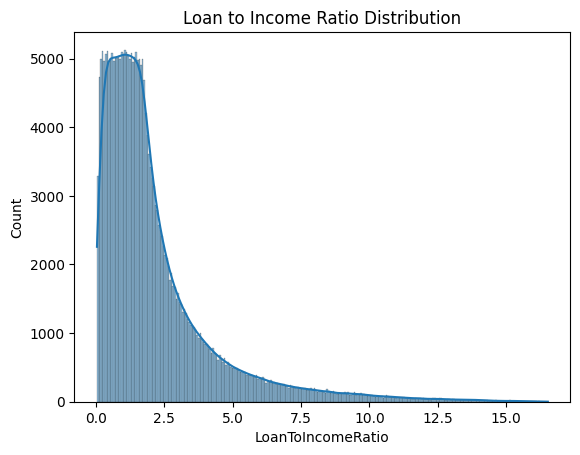

In [72]:
sns.histplot(data['LoanToIncomeRatio'], kde=True)
plt.title('Loan to Income Ratio Distribution')
plt.show()
## mostly data has people whose income is more than loan amount

In [73]:
data['LoanToIncomeRatio'].describe()
conditions= [
   (data['LoanToIncomeRatio']<=0.20),
    (data['LoanToIncomeRatio']>0.20) & (data['LoanToIncomeRatio']<=0.4),
    (data['LoanToIncomeRatio']>0.4) & (data['LoanToIncomeRatio']<=0.6),
    (data['LoanToIncomeRatio']>0.6) & (data['LoanToIncomeRatio']<=0.8),
     (data['LoanToIncomeRatio']>0.8)
]
choice= ['very low','low','moderate','high','very high']
data['LoanToIncomeRatio_group']= np.select(conditions,choice,default='unknown')


In [74]:
data.groupby(['LoanToIncomeRatio_group'])['Default'].mean()

,Default
LoanToIncomeRatio_group,
high,0.083782
low,0.077209
moderate,0.080392
very high,0.128272
very low,0.075314


- very high bin indicates that loan amount taken is more than the income and thus most defaulters are present there

## EmploymentLengthGroup

In [75]:
data.groupby(['EmploymentLengthGroup'])['Default'].mean()

,Default
EmploymentLengthGroup,
<1yr,0.169076
1-5yr,0.134950
5-10yr,0.089161
10-20yr,NaN
20+yr,NaN


- people with <1year employment tenure has mire defaulterd

## CreditScorePerIncome

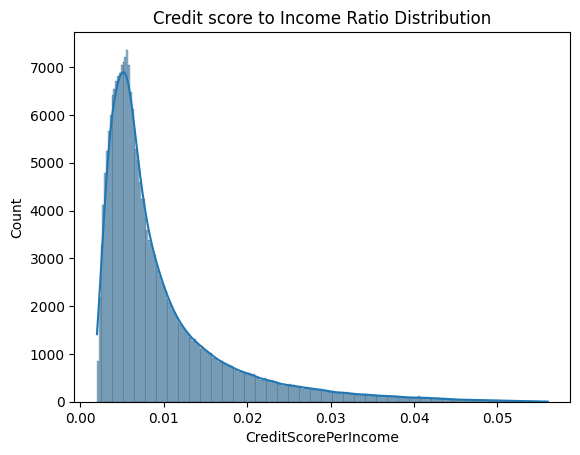

In [76]:
sns.histplot(data['CreditScorePerIncome'], kde=True)
plt.title('Credit score to Income Ratio Distribution')
plt.show()
## mostly data has people whose income is more than loan amount

In [79]:
data['CreditScorePerIncome'].describe()
conditions= [
   (data['CreditScorePerIncome']<=0.005),
    (data['CreditScorePerIncome']>0.005) & (data['CreditScorePerIncome']<=0.01),
    (data['CreditScorePerIncome']>0.01) & (data['CreditScorePerIncome']<=0.015),
    (data['CreditScorePerIncome']>0.015) & (data['CreditScorePerIncome']<=0.025),
     (data['CreditScorePerIncome']>0.025)
]
choice= ['very high risk','high risk','moderate risk','low risk','very low risk']
data['CreditScorePerIncome_group']= np.select(conditions,choice,default='unknown')


In [80]:
data.groupby(['CreditScorePerIncome_group'])['Default'].mean()

,Default
CreditScorePerIncome_group,
high risk,0.097178
low risk,0.159313
moderate risk,0.122052
very high risk,0.100619
very low risk,0.220961


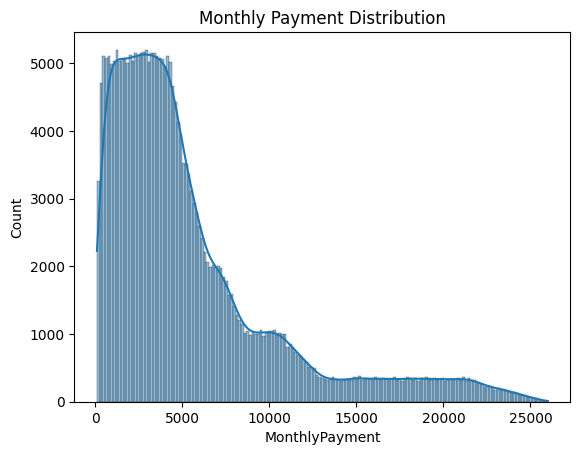

In [81]:
sns.histplot(data['MonthlyPayment'], kde=True)
plt.title('Monthly Payment Distribution')
plt.xlabel('MonthlyPayment')
plt.show()

In [82]:
data['MonthlyPayment'].describe()
conditions= [
   (data['MonthlyPayment']<=500),
    (data['MonthlyPayment']>500) & (data['MonthlyPayment']<=1000),
    (data['MonthlyPayment']>1000) & (data['MonthlyPayment']<=1500),
    (data['MonthlyPayment']>1500) & (data['MonthlyPayment']<=2500),
     (data['MonthlyPayment']>2500)
]
choice= ['very low','low','moderate','high','very high']
data['MonthlyPayment_group']= np.select(conditions,choice,default='unknown')


In [83]:
data.groupby(['MonthlyPayment_group'])['Default'].mean()

,Default
MonthlyPayment_group,
high,0.093547
low,0.080092
moderate,0.085563
very high,0.129392
very low,0.071941


- higher monthly payment burden leading to more defaulters

## Correlation

In [85]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()


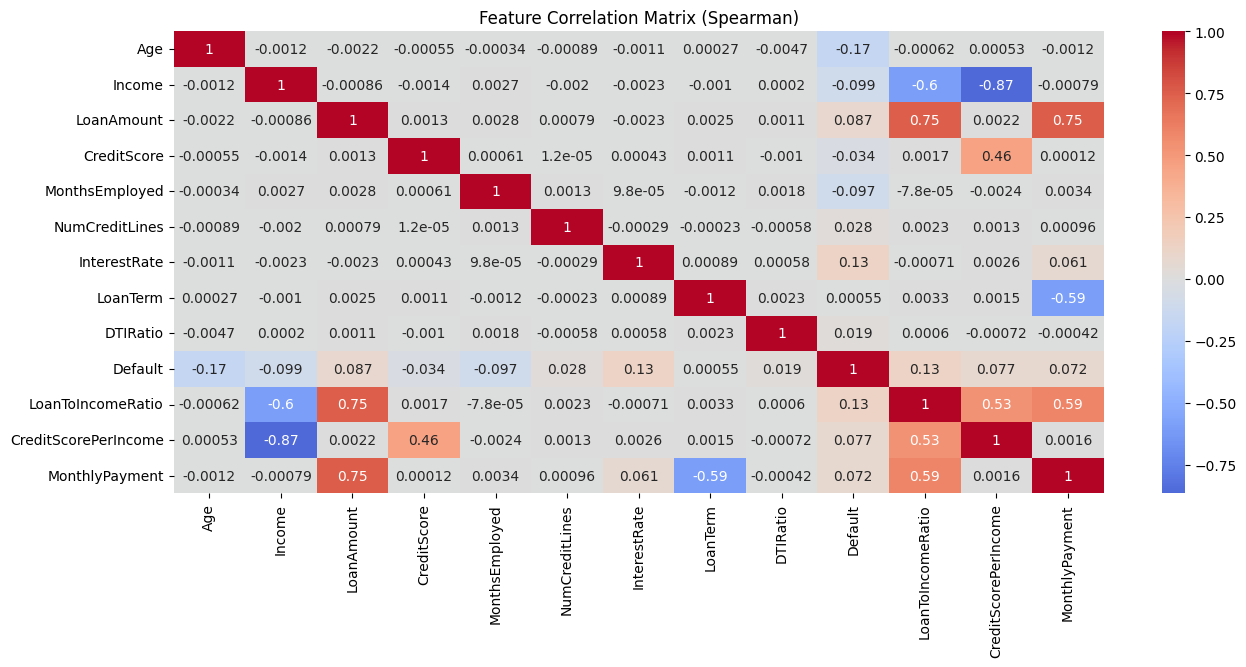

In [87]:
plt.figure(figsize=(15, 6))
sns.heatmap(data[numeric_columns].corr(method='spearman'), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Spearman)')
plt.show()

- income, loan amount and credit score are correlated

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
data2 = data.drop(columns=data.filter(like='_group').columns)

correlations = data2[numeric_columns].corr()['Default'].sort_values(ascending=False)


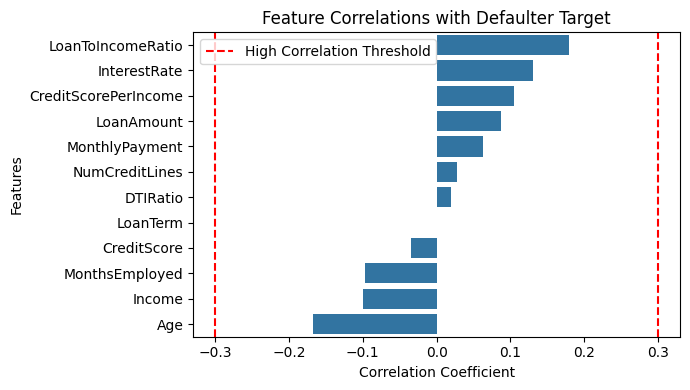

In [111]:
# I proceed to visualize the correlations
plt.figure(figsize=(7, 4))
correlations_df = pd.DataFrame(correlations[1:])
correlations_df.columns = ['Correlation with Defaulter']
sns.barplot(data=correlations_df.reset_index(), x='Correlation with Defaulter', y='index')
plt.title('Feature Correlations with Defaulter Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0.3, color='r', linestyle='--', label='High Correlation Threshold')
plt.axvline(x=-0.3, color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

- loan to income ratio, interest rate, age income play a very significant role